<a href="https://colab.research.google.com/github/DeepankarAcharyya/transfer_learning_demo/blob/main/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## For this demonstration, we will use data from the Dogs vs Cats dataset, available in kaggle.

### Downloading the dataset from Kaggle

URL : https://www.kaggle.com/c/dogs-vs-cats

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [4]:
%cd /content/drive/MyDrive/Projects-Misc/Transfer-Learning-Demo
base_dir = "/content/drive/MyDrive/Projects-Misc/Transfer-Learning-Demo"

/content/drive/MyDrive/Projects-Misc/Transfer-Learning-Demo


In [8]:
!kaggle competitions download -c dogs-vs-cats

 98% 266M/271M [00:03<00:00, 99.7MB/s]
100% 271M/271M [00:03<00:00, 76.9MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 12.2MB/s]
 99% 540M/543M [00:06<00:00, 73.4MB/s]
100% 543M/543M [00:06<00:00, 87.8MB/s]


### Extracting/ unzipping the downloaded zipped files

In [9]:
!unzip test1.zip
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

## Data Exploration:

In [10]:
import pandas as pd
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [11]:
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test1')

In [12]:
train_images = os.listdir(train_dir)
test_images = os.listdir(test_dir)

print('Number of training images :', len(train_images))
print('Number of testing images :',len(test_images))

Number of training images : 25000
Number of testing images : 12500


### NOTE :
> Out of all the available training images, we will only use a set of randomly selected 999 images for training purpose.

> For testing our final model, we will use images from the testing set.

### Visualizing the images

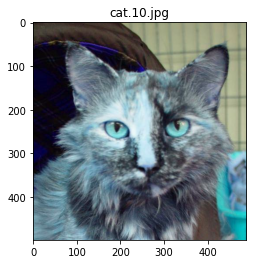

In [17]:
image = cv2.imread(os.path.join(train_dir,train_images[2]))
plt.title(train_images[2])
plt.imshow(image)

### Defining a function for creating the target data from the image names :

In [18]:
def create_target(data_set):
  # 0=> cats && 1=> dogs
  y=[]
  for eachimage in data_set:
    if 'cat' in eachimage:
      y.append(0)
    elif 'dog' in eachimage:
      y.append(1)
    else:
      y.append(-1)
  return y

#### Testing out out function :

In [20]:
np.random.shuffle(train_images)
y1 = create_target(train_images[:5])
print('Length of the target:', len(y1))
for i in zip(train_images[:5],y1):
  print(i)

Length of the target: 5
('cat.5423.jpg', 0)
('cat.8317.jpg', 0)
('dog.11517.jpg', 1)
('dog.8983.jpg', 1)
('dog.2091.jpg', 1)


## Downloading the pre-trained model and setting it up :



---



## For our classification task, we will be using the keras' pre-trained xception model with weights trained on the imagenet dataset.